# Comcast Telecom Consumer Complaints

In [70]:
#Importing libraries

import pandas as pd
import numpy as np

#from sorted_months_weekdays import *
#from sort_dataframeby_monthorweek import *

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

#import plotly.express as px
#import plotly.graph_objects as go


In [71]:
# reading data to data frame
df = pd.read_csv('Comcast_telecom_complaints_data.csv')

## Basic data check

In [72]:
df.shape

(2224, 11)

In [73]:
df.dtypes

Ticket #                       object
Customer Complaint             object
Date                           object
Date_month_year                object
Time                           object
Received Via                   object
City                           object
State                          object
Zip code                        int64
Status                         object
Filing on Behalf of Someone    object
dtype: object

In [74]:
df.head()
#df.tail()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [75]:
#Checking duplicate rows based on all columns
dup_df = df[df.duplicated()]
dup_df

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone


In [ ]:
# based on the results we see that thare are no duplicate row entrys based on all the columns

In [76]:
#checking missing values
df.isnull().sum()

Ticket #                       0
Customer Complaint             0
Date                           0
Date_month_year                0
Time                           0
Received Via                   0
City                           0
State                          0
Zip code                       0
Status                         0
Filing on Behalf of Someone    0
dtype: int64

In [ ]:
# we see that there is no missing values in the data set.

In [77]:
df.describe(include='all')

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
count,2224,2224,2224,2224,2224,2224,2224,2224,2224.000000,2224,2224
unique,2224,1841,91,91,2190,2,928,43,NaN,4,2
top,317911,Comcast,24-06-15,24-Jun-15,3:25:33 PM,Customer Care Call,Atlanta,Georgia,NaN,Solved,No
freq,1,83,218,218,2,1119,63,288,NaN,973,2021
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47994.393435,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28885.279427,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1075.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30056.500000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37211.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77058.750000,NaN,NaN


### Observations 1:
* We have 2224 rows and 11 columns
* We see date and date_month_year and time are of type object and we may need to format it to correct data type for further analysis
* There are no duplicates records based on all columns
* There are no missing values in the given dataset

## to Analyze:
- Provide the trend chart for the number of complaints at monthly and daily granularity levels.
- Provide a table with the frequency of complaint types.
    * Which complaint types are maximum i.e., around internet, network issues, or across any other domains.

- Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.
- Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on:
    * Which state has the maximum complaints
    * Which state has the highest percentage of unresolved complaints

- Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

### Data Preparation & Approach

Looking at the above set of details to analyse, we need to first prep the given data

* for checking the trend of number of complaint,s we need to format the given date and time data which is currently in string/object into correct datetime fromat so that we can apply datetime funcstions to the data to summarise or create plots correctly


* To find out the complaint types, we need to create a custom Complaint Types category based on the customer complaints
   * Since there is no complaint types or category provided, we can use pandas methods to find the key word frequency ( example, internet, billing, etc) using the Customer Complaints data to get the general sense on what type of issues/complaints are being reported
   * using these key word frequency, we can create a custome category of Coustomer complalints
   
   
* Using this newly created Complaint Types category we can create afrequency table of complaint types


* We need to create a new  Status Category column in the data frame using the Status column ( Open, Closed, Pending and solved , such that Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.


* any additional helper columns can be added to the dataframe to help make analysis easy

### Formatting date and time

In [78]:
df_comcast=df.copy()

In [79]:
df_comcast.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [80]:
#sorting all data by col = Date 	Date_month_year in ascending order of Date 	Date_month_year
df_comcast.sort_values(by='Date_month_year',ascending=True,inplace=True)
df_comcast.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
1416,218108,Comcast Business Phone/Internet Contract Disag...,04-04-15,04-Apr-15,6:39:55 PM,Internet,Newnan,Georgia,30265,Closed,No
1483,217985,bait and switch services for monetary gain,04-04-15,04-Apr-15,4:07:36 PM,Internet,Orcutt,California,93455,Closed,No
584,217999,Misleading information given,04-04-15,04-Apr-15,4:21:46 PM,Internet,Des Moines,Washington,98148,Closed,Yes
561,218043,comcast services,04-04-15,04-Apr-15,5:32:05 PM,Internet,Denver,Colorado,80227,Closed,No
1892,218168,Multiple Unauthorized and Unwarranted Credit C...,04-04-15,04-Apr-15,8:10:35 PM,Customer Care Call,Shoreview,Minnesota,55126,Closed,No


In [81]:
#combing date and Time and creating a new col
df_comcast['datetime']= df_comcast['Date']+' '+df_comcast['Time']
df_comcast.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,datetime
1416,218108,Comcast Business Phone/Internet Contract Disag...,04-04-15,04-Apr-15,6:39:55 PM,Internet,Newnan,Georgia,30265,Closed,No,04-04-15 6:39:55 PM
1483,217985,bait and switch services for monetary gain,04-04-15,04-Apr-15,4:07:36 PM,Internet,Orcutt,California,93455,Closed,No,04-04-15 4:07:36 PM
584,217999,Misleading information given,04-04-15,04-Apr-15,4:21:46 PM,Internet,Des Moines,Washington,98148,Closed,Yes,04-04-15 4:21:46 PM
561,218043,comcast services,04-04-15,04-Apr-15,5:32:05 PM,Internet,Denver,Colorado,80227,Closed,No,04-04-15 5:32:05 PM
1892,218168,Multiple Unauthorized and Unwarranted Credit C...,04-04-15,04-Apr-15,8:10:35 PM,Customer Care Call,Shoreview,Minnesota,55126,Closed,No,04-04-15 8:10:35 PM


In [82]:
df_comcast[['datetime']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2224 entries, 1416 to 464
Data columns (total 1 columns):
datetime    2224 non-null object
dtypes: object(1)
memory usage: 34.8+ KB


In [83]:
#Converting datetime which is in string/object format to datetime format
df_comcast['datetime'] = pd.to_datetime(df_comcast['datetime'],format='%d-%m-%y %I:%M:%S %p')
df_comcast[['datetime']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2224 entries, 1416 to 464
Data columns (total 1 columns):
datetime    2224 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 34.8 KB


In [84]:
#checking that the datetime col is formatted correctly and applying datetie methods
df_comcast.loc[1416,'datetime'].day_name()

'Saturday'

In [18]:
df_comcast.shape

(2224, 12)

In [85]:
df_comcast.head(2)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,datetime
1416,218108,Comcast Business Phone/Internet Contract Disag...,04-04-15,04-Apr-15,6:39:55 PM,Internet,Newnan,Georgia,30265,Closed,No,2015-04-04 18:39:55
1483,217985,bait and switch services for monetary gain,04-04-15,04-Apr-15,4:07:36 PM,Internet,Orcutt,California,93455,Closed,No,2015-04-04 16:07:36


In [ ]:
# sorting the dataframe by date in ascending order

In [86]:
df_comcast.sort_values('datetime',inplace=True)
df_comcast.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,datetime
1852,211255,Comcast harassment,04-01-15,04-Jan-15,12:18:47 AM,Customer Care Call,Schaumburg,Illinois,60193,Closed,No,2015-01-04 00:18:47
1160,211472,comcast cable,04-01-15,04-Jan-15,10:43:20 AM,Customer Care Call,Lockport,Illinois,60441,Closed,No,2015-01-04 10:43:20
1430,211478,Comcast,04-01-15,04-Jan-15,10:47:35 AM,Internet,North Huntingdon,Pennsylvania,15642,Closed,No,2015-01-04 10:47:35
2144,211677,Comcast refusal of service,04-01-15,04-Jan-15,12:01:06 PM,Customer Care Call,Wayne,Pennsylvania,19087,Closed,No,2015-01-04 12:01:06
1237,211775,Horrible Service,04-01-15,04-Jan-15,12:28:58 PM,Customer Care Call,Mckeesport,Pennsylvania,15132,Closed,No,2015-01-04 12:28:58


In [63]:
# now that we have created a col with correct datetime format, we can create additional columns for Year, Month and date
# using the pandas datetime methods

In [25]:
#df_comcast.drop(['date'],axis=1,inplace=True)
#df_comcast.head(2)

In [87]:
#df_comcast['Year'] = pd.DatetimeIndex(df_comcast['datetime']).year
#df_comcast['Month'] = pd.DatetimeIndex(df_comcast['datetime']).month
#df_comcast['date'] = pd.DatetimeIndex(df_comcast['datetime']).date

df_comcast['Year'] = df_comcast['datetime'].dt.strftime('%Y')
df_comcast['Month'] = df_comcast['datetime'].dt.strftime('%b')
df_comcast['date']=df_comcast['datetime'].dt.strftime('%d-%b-%Y')

# convert this date to correct date format
df_comcast['date'] = pd.to_datetime(df_comcast['date'])

In [27]:
df_comcast.head(2)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,datetime,Year,Month,date
1852,211255,Comcast harassment,04-01-15,04-Jan-15,12:18:47 AM,Customer Care Call,Schaumburg,Illinois,60193,Closed,No,2015-01-04 00:18:47,2015,Jan,2015-01-04
1160,211472,comcast cable,04-01-15,04-Jan-15,10:43:20 AM,Customer Care Call,Lockport,Illinois,60441,Closed,No,2015-01-04 10:43:20,2015,Jan,2015-01-04


In [88]:
df_comcast[['date']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2224 entries, 1852 to 441
Data columns (total 1 columns):
date    2224 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 34.8 KB


In [ ]:
# adding helper column for count of tickets for aggregagtion

In [89]:
df_comcast['Ticket_count']=1
df_comcast.head(2)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,datetime,Year,Month,date,Ticket_count
1852,211255,Comcast harassment,04-01-15,04-Jan-15,12:18:47 AM,Customer Care Call,Schaumburg,Illinois,60193,Closed,No,2015-01-04 00:18:47,2015,Jan,2015-01-04,1
1160,211472,comcast cable,04-01-15,04-Jan-15,10:43:20 AM,Customer Care Call,Lockport,Illinois,60441,Closed,No,2015-01-04 10:43:20,2015,Jan,2015-01-04,1


### Q1.Provide the trend chart for the number of complaints at monthly and daily granularity levels.

In [61]:
# now that we have created a col with correct datetime format, we can use the col to plot the trend charts

In [90]:
monthly_tickets_df = df_comcast.groupby(['Month'])[['Ticket_count']].sum().reset_index()
monthly_tickets_df.head()
monthly_tickets_df.tail()

# sorting the monthly_tickets_df in calendar months order
from sorted_months_weekdays import *
from sort_dataframeby_monthorweek import *
monthly_tickets_df=Sort_Dataframeby_Month(df=monthly_tickets_df,monthcolumnname='Month')
monthly_tickets_df.head()

,Month,Ticket_count
0,Jan,55
1,Feb,59
2,Mar,45
3,Apr,375
4,May,317


In [91]:
import matplotlib.pyplot as plt
%matplotlib inline

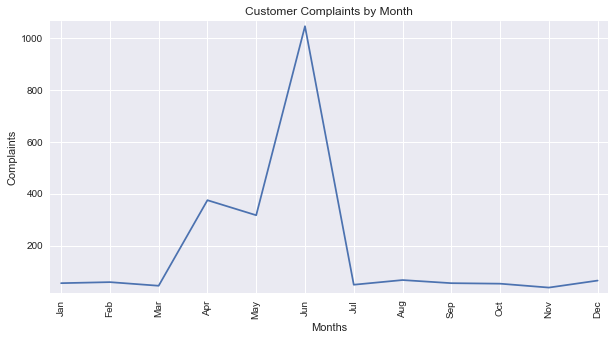

In [92]:
plt.figure(figsize=(10,5))
plt.plot(monthly_tickets_df['Month'],monthly_tickets_df['Ticket_count'])
plt.xticks(rotation=90)
plt.margins(0.02)

plt.title('Customer Complaints by Month')
plt.xlabel('Months')
plt.ylabel('Complaints')
plt.show()


In [93]:
daily_tickets_df = df_comcast.groupby(['date'])[['Ticket_count']].sum().reset_index()
daily_tickets_df.head()
daily_tickets_df.tail()

,date,Ticket_count
86,2015-11-05,12
87,2015-11-06,21
88,2015-12-04,15
89,2015-12-05,7
90,2015-12-06,43


In [94]:
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
plt.style.use('seaborn')

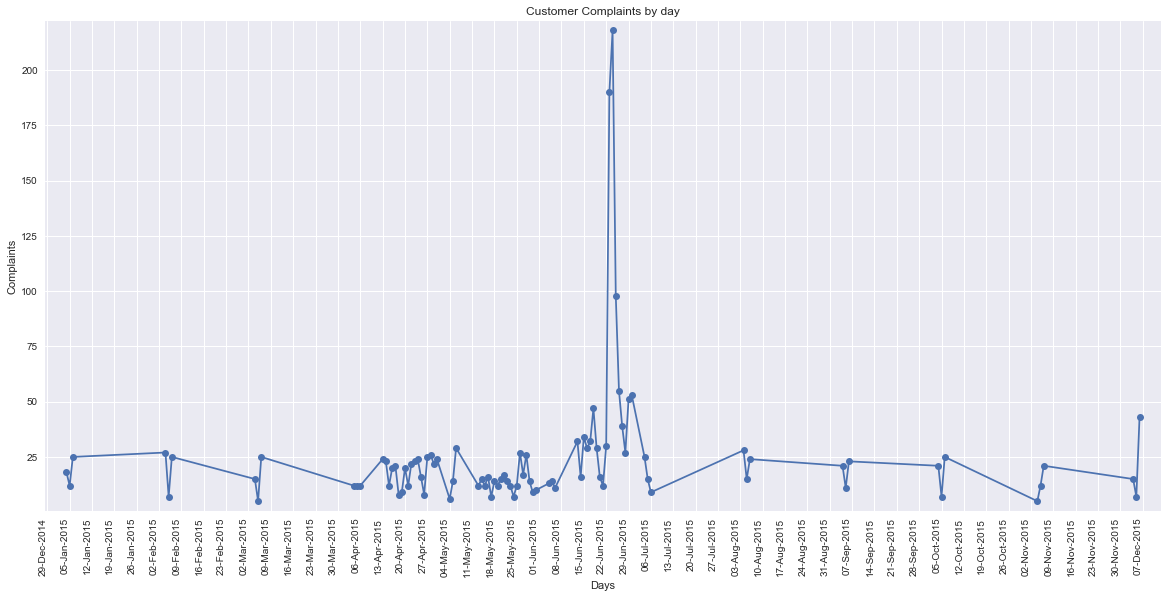

In [95]:
plt.figure(figsize=(20,10))
plt.plot_date(daily_tickets_df['date'], daily_tickets_df['Ticket_count'], linestyle='solid')
plt.gcf().autofmt_xdate()
plt.gca().xaxis.set_major_formatter(mpl_dates.DateFormatter('%d-%b-%Y'))
plt.gca().xaxis.set_major_locator(mpl_dates.DayLocator(interval=7))
plt.xticks(rotation=90)
plt.margins(0.02)

plt.title('Customer Complaints by day')
plt.xlabel('Days')
plt.ylabel('Complaints')

plt.show()

In [213]:
# using plotly charts to get the full view of the complainst by date

In [96]:
import plotly.express as px
import plotly.graph_objects as go

In [97]:
fig = px.line(daily_tickets_df, x="date", y="Ticket_count", title='Customer complaints by day') 
fig.update_xaxes(ticklabelmode="period",tickangle = -45,tick0 = 0.5,dtick = 0,rangeslider_visible=True)
fig.show()

## Observations 2:
    * By looking at the Monthly chart and daily trend of customer complains tickets, we see a steep rise in the month of           
      May, Jun and July,in the number of tickets
    * we see that highest number of complaints tickets are being handled in the month of June
    * On June 24 2015, we have handled 218 complaints tickets, highest compared to any other days in the year
    * We need to do further analysis to check why there is a sudden raise of ticekts, especially in Jun

In [226]:
# Lets check number of tickets by status

In [98]:
df_comcast['Status'].value_counts()

Solved     973
Closed     734
Open       363
Pending    154
Name: Status, dtype: int64

In [99]:
monthly_tickets_status_df = df_comcast.groupby(['Month','Status'])[['Ticket_count']].sum().reset_index()
monthly_tickets_status_df.head()
monthly_tickets_status_df.tail()

# sorting the monthly_tickets_df in calendar months order
from sorted_months_weekdays import *
from sort_dataframeby_monthorweek import *
monthly_tickets_status_df=Sort_Dataframeby_Month(df=monthly_tickets_status_df,monthcolumnname='Month')
monthly_tickets_status_df.head()

,Month,Status,Ticket_count
0,Jan,Closed,39
1,Jan,Open,5
2,Jan,Solved,11
3,Feb,Closed,46
4,Feb,Open,4


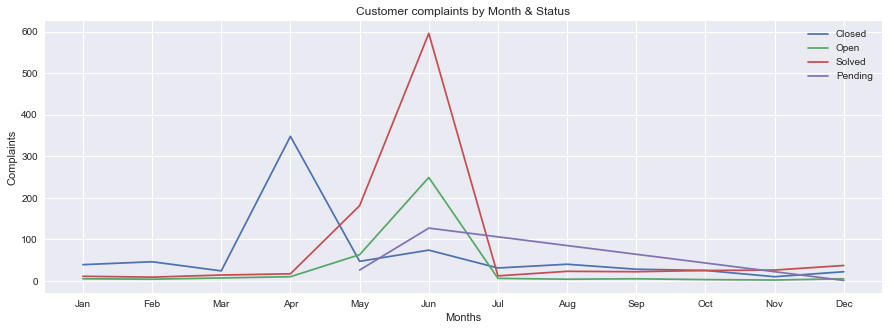

In [408]:
df1=monthly_tickets_status_df[monthly_tickets_status_df['Status']=='Closed']
df2=monthly_tickets_status_df[monthly_tickets_status_df['Status']=='Open']
df3=monthly_tickets_status_df[monthly_tickets_status_df['Status']=='Solved']
df4=monthly_tickets_status_df[monthly_tickets_status_df['Status']=='Pending']

plt.figure(figsize=(15,5))
plt.plot(df1['Month'], df1['Ticket_count'],label='Closed')
plt.plot(df2['Month'], df2['Ticket_count'],label='Open')
plt.plot(df3['Month'], df3['Ticket_count'],label='Solved')
plt.plot(df4['Month'], df4['Ticket_count'],label='Pending')
plt.legend()

plt.title('Customer complaints by Month & Status')
plt.xlabel('Months')
plt.ylabel('Complaints')

plt.show()

In [410]:
#fig = px.line(monthly_tickets_status_df, x="Month", y="Ticket_count",color='Status',
              #title='Customer complaints by Month & Status') 
#fig.update_xaxes(tickangle = -45)
#fig.show()

### Observations 3:
    * We can see that in the month of Jun, we received most number of ticekts and also most of the tickets were solved
    * this kind of explains the spkie of tickets being handled in Jun
    * It will be interesting to how was the trend of tickets handled by status month on month

In [233]:
# Creating a table with the monthly_tickets_status_df

In [191]:
#groupng a df by Month and status
df_status = df_comcast.groupby(['Month','Status'])['Ticket_count'].sum().unstack().fillna(0)
df_status.reset_index(inplace=True)


# sorting the mont column in correct month order
from sorted_months_weekdays import *
from sort_dataframeby_monthorweek import *
df_status=Sort_Dataframeby_Month(df=df_status,monthcolumnname='Month')

# cacluation to see total open ticekts % and Closed tickets % by month
df_status['Closed+Solved'] = df_status['Closed'] + df_status['Solved']
df_status['Open+pending'] = df_status['Open'] + df_status['Pending']
df_status['Total'] = df_status['Closed+Solved']  + df_status['Open+pending']
df_status['Open_pct'] = df_status['Open+pending']/df_status['Total']
df_status['Closed_pct'] = df_status['Closed+Solved']/df_status['Total']

#def highlightvalue(s):
    #if s.Open_pct > 0.10:
        #return ['background-color: yellow']*10
    #else:
        #return ['background-color: white']*10

#df_status=df_status.style.apply(highlightvalue, axis=1)

#df_status[['Open%']].style.applymap(lambda x: 'background-color : yellow' if x>0.10 else '')
# formating the Open% and Closed %columns to display the values in %
#df_status['Open_pct'] = df_status[['Open_pct']].applymap(lambda x: "{0:.2f}%".format(x*100))
#df_status['Closed_pct'] = df_status[['Closed_pct']].applymap(lambda x: "{0:.2f}%".format(x*100))

def color_negative_red(value):
  """
  Colors elements in a dateframe
  green if positive and red if
  negative. Does not color NaN
  values.
  """

  if value > 0.10:
    color = 'red'
  else:
    color = 'black'

  return 'color: %s' % color
df_status=df_status.style.applymap(color_negative_red, subset=['Open_pct']).format({'Open_pct': "{:.2%}",'Closed_pct': "{:.2%}"})

df_status

,Month,Closed,Open,Pending,Solved,Closed+Solved,Open+pending,Total,Open_pct,Closed_pct
0,Jan,39,5,0,11,50,5,55,9.09%,90.91%
1,Feb,46,4,0,9,55,4,59,6.78%,93.22%
2,Mar,24,7,0,14,38,7,45,15.56%,84.44%
3,Apr,348,10,0,17,365,10,375,2.67%,97.33%
4,May,47,63,26,181,228,89,317,28.08%,71.92%
5,Jun,74,249,127,596,670,376,1046,35.95%,64.05%
6,Jul,31,6,0,12,43,6,49,12.24%,87.76%
7,Aug,40,4,0,23,63,4,67,5.97%,94.03%
8,Sep,28,5,0,22,50,5,55,9.09%,90.91%
9,Oct,25,3,0,25,50,3,53,5.66%,94.34%


### Observations 4:
   * It appears that, there has been  sudden jump in the customer complaints in may and jun
   * mar, may, jul, and jul we seem to have highest open tickets compared to any other months

## Q2 - Provide a table with the frequency of complaint types.
* Which complaint types are maximum i.e., around internet, network issues, or across any other domains.

In [202]:
df_comcast_Complaints =df_comcast.groupby('Customer Complaint')[['Ticket_count']].sum().sort_values(by='Ticket_count',ascending=False)
df_comcast_Complaints.head(10)

,Ticket_count
Customer Complaint,
Comcast,83
Comcast Internet,18
Comcast Data Cap,17
comcast,13
Comcast Billing,11
Comcast Data Caps,11
Data Caps,11
Unfair Billing Practices,9
Comcast data cap,8


Creating a frequency of complaints using the Customer Complaints column, doe snot give us much infromation

* firstly these Customer complaints provided are the full complaints information and not a category of complaints
  to demonstrate which type of Customer complaints are more than other.
* secondly, we do not have a pre defined Complaint Types to group these list of Customer complaints

To find out the complaint types, we need to create a custom Complaint Types category based on the customer complaints

Since there is no complaint types or category provided, we can use pandas methods to find the key word frequency ( example, internet, billing, etc) using the Customer Complaints data to get the general sense on what type of issues/complaints are being reported using these key word frequency, we can create a customer category of Customer complaints


In [204]:
# finding the frequency of the words appear in the Customer Complaints Column and visualing using wordcloud

In [210]:
from wordcloud import WordCloud, STOPWORDS

In [212]:
# converting the Custome Complaints col to list
complaints_list= df_comcast['Customer Complaint']

# capitalizing every word i the list
new_complaints_list=[]
for complaints in complaints_list:
    new_complaints_list.append(complaints.title())
    

#Creeating final list of words by removing undwated words
words = new_complaints_list
words = set(words)
stopwords = ['Comcast','And','To','For','My','Comcast','The','Of','Not','With']
stopwords = set(stopwords)
final_Complaint_list = words - stopwords
final_Complaint_list = list(final_Complaint_list)

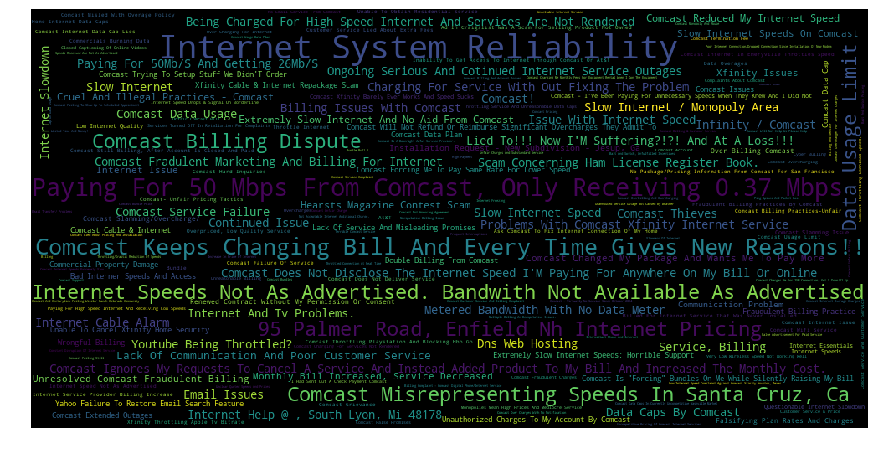

In [213]:
from collections import Counter
word_could_dict=Counter(final_Complaint_list)
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_could_dict)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [214]:
# from the word cloud we could see that Internet and Billing seems to be more prominent types of issues
# we can explore more to see if there are any other group or types

In [217]:
complaints = df_comcast['Customer Complaint'].str.split(expand=True).stack().value_counts()
complaints.head(50)

Comcast       1031
Internet       317
and            269
service        251
internet       182
to             175
for            173
Billing        156
Service        153
Data           151
of             111
billing        111
comcast         90
my              75
not             75
with            72
Cap             63
speed           63
data            63
on              56
-               53
Unfair          48
me              47
in              47
Speed           47
customer        45
a               45
Caps            44
is              44
Xfinity         43
Practices       43
issues          43
bill            43
Issues          40
by              40
the             39
speeds          39
Complaint       39
I               38
Customer        38
no              37
from            37
cap             37
charges         36
services        35
COMCAST         35
Throttling      33
&               32
caps            31
Slow            30
dtype: int64

#### looking at the word cloud and the details of complaints, we can probably create a Complaint Type category under
•	Internet # issues related to internet connectivity, speed, network
•	Billing # issues related to Billing, charges, etc
•	Data # issues related to data, data cap, etc
•	Service # customer service issues
•	Others # others
This is just a best guess and map Complaint type category based on the frequency of words being found in the Customer Complaints details


In [218]:
# creating an additional column to df_comcast with Complaint_Types

In [238]:
masks = [df_comcast['Customer Complaint'].str.lower().str.contains('internet'),
    df_comcast['Customer Complaint'].str.lower().str.contains('speed'),
    df_comcast['Customer Complaint'].str.lower().str.contains('connection'),
    df_comcast['Customer Complaint'].str.lower().str.contains('billing'),
    df_comcast['Customer Complaint'].str.lower().str.contains('bil'),
    df_comcast['Customer Complaint'].str.lower().str.contains('fee'),
    df_comcast['Customer Complaint'].str.lower().str.contains('charge'),
    df_comcast['Customer Complaint'].str.lower().str.contains('pric'),
    df_comcast['Customer Complaint'].str.lower().str.contains('data'),
    df_comcast['Customer Complaint'].str.lower().str.contains('cap'),
    df_comcast['Customer Complaint'].str.lower().str.contains('service'),

]

values = [
    'Internet',
    'Internet',  
    'Internet', 
    'Billing',
    'Billing',
    'Billing',
    'Billing',
    'Billing',
    'Data',
    'Data',
    'Service'

]

import numpy as np

df_comcast['Complaint_Types'] = np.select(masks, values, default='Others')

In [239]:
df_comcast.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,datetime,Year,Month,date,Ticket_count,Complaint_Types
1852,211255,Comcast harassment,04-01-15,04-Jan-15,12:18:47 AM,Customer Care Call,Schaumburg,Illinois,60193,Closed,No,2015-01-04 00:18:47,2015,Jan,2015-01-04,1,Others
1160,211472,comcast cable,04-01-15,04-Jan-15,10:43:20 AM,Customer Care Call,Lockport,Illinois,60441,Closed,No,2015-01-04 10:43:20,2015,Jan,2015-01-04,1,Others
1430,211478,Comcast,04-01-15,04-Jan-15,10:47:35 AM,Internet,North Huntingdon,Pennsylvania,15642,Closed,No,2015-01-04 10:47:35,2015,Jan,2015-01-04,1,Others
2144,211677,Comcast refusal of service,04-01-15,04-Jan-15,12:01:06 PM,Customer Care Call,Wayne,Pennsylvania,19087,Closed,No,2015-01-04 12:01:06,2015,Jan,2015-01-04,1,Service
1237,211775,Horrible Service,04-01-15,04-Jan-15,12:28:58 PM,Customer Care Call,Mckeesport,Pennsylvania,15132,Closed,No,2015-01-04 12:28:58,2015,Jan,2015-01-04,1,Service


In [240]:
#creating a table with the frequency of the newly created complaint Types
df_comcast.groupby(['Complaint_Types'])[['Ticket_count']].sum().sort_values(by='Ticket_count', ascending=False)

,Ticket_count
Complaint_Types,
Internet,636
Others,612
Billing,542
Service,239
Data,195


* as per the data we can say that Internet, Billing and others are the three areas where we can see most of the complaints being recorded
* We can probably look more deeper into these complaints to understand more on the issues


# Q3. Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.

In [243]:
conditions= [df_comcast['Status']=='Closed',df_comcast['Status']=='Solved',
             df_comcast['Status']=='Open',df_comcast['Status']=='Pending']

values=['Closed','Closed','Open','Open']

df_comcast['Ticket_Status'] = np.select(conditions,values)
df_comcast.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,datetime,Year,Month,date,Ticket_count,Complaint_Types,Ticket_Status
1852,211255,Comcast harassment,04-01-15,04-Jan-15,12:18:47 AM,Customer Care Call,Schaumburg,Illinois,60193,Closed,No,2015-01-04 00:18:47,2015,Jan,2015-01-04,1,Others,Closed
1160,211472,comcast cable,04-01-15,04-Jan-15,10:43:20 AM,Customer Care Call,Lockport,Illinois,60441,Closed,No,2015-01-04 10:43:20,2015,Jan,2015-01-04,1,Others,Closed
1430,211478,Comcast,04-01-15,04-Jan-15,10:47:35 AM,Internet,North Huntingdon,Pennsylvania,15642,Closed,No,2015-01-04 10:47:35,2015,Jan,2015-01-04,1,Others,Closed
2144,211677,Comcast refusal of service,04-01-15,04-Jan-15,12:01:06 PM,Customer Care Call,Wayne,Pennsylvania,19087,Closed,No,2015-01-04 12:01:06,2015,Jan,2015-01-04,1,Service,Closed
1237,211775,Horrible Service,04-01-15,04-Jan-15,12:28:58 PM,Customer Care Call,Mckeesport,Pennsylvania,15132,Closed,No,2015-01-04 12:28:58,2015,Jan,2015-01-04,1,Service,Closed


# Q4. Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on:

    Which state has the maximum complaints
    Which state has the highest percentage of unresolved complaints



In [244]:
df_state=df_comcast.groupby(['State','Ticket_Status'])[['Ticket #']].count().reset_index()
df_state.head()

,State,Ticket_Status,Ticket #
0,Alabama,Closed,17
1,Alabama,Open,9
2,Arizona,Closed,14
3,Arizona,Open,6
4,Arkansas,Closed,6


In [250]:
#plt.figure(figsize=(15,5))
#plt.bar(x=df_state[df_state['Ticket_Status']=='Closed']['State'],height=df_state[df_state['Ticket_Status']=='Closed']['Ticket #'],label ='Closed')
#plt.bar(x=df_state[df_state['Ticket_Status']=='Open']['State'],height=df_state[df_state['Ticket_Status']=='Open']['Ticket #'],label ='Open')
#plt.title('State wise status of complaints')
#plt.xlabel('State')
#plt.ylabel('# of Customer complaints')
#plt.xticks(rotation=90)
#plt.legend()
#plt.show()

In [251]:
fig = px.bar(df_state, x="State", y='Ticket #', color="Ticket_Status", title="state wise status of complaints")
fig.show()

#### Which state has the maximum complaints
* from the above bar chart it is clear that Georgia has the Maxinum number of complaints

In [270]:
#State Group
df_state_grp = df_comcast.groupby(['State'])[['Ticket_count']].sum()
df_state_grp.loc[df_state_grp['Ticket_count']== df_state_grp['Ticket_count'].max()]

,Ticket_count
State,
Georgia,288


In [ ]:
df_state_grp.loc[df_state_grp['Ticket count']== df_state_grp['Ticket count'].max()]

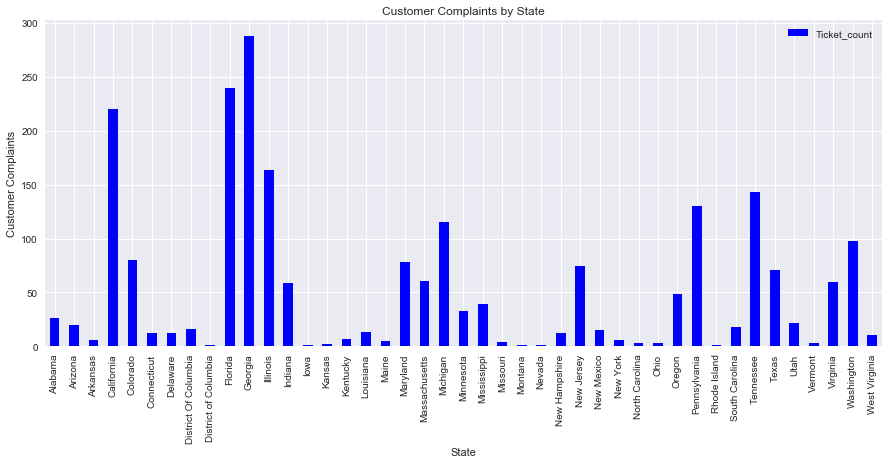

In [271]:
ax=df_state_grp.plot(kind='bar',figsize=(15,6),rot=90,color='b',width=0.5)
plt.title('Customer Complaints by State')
plt.ylabel('Customer Complaints')
plt.show()

#### Which state has the highest percentage of unresolved complaints

In [285]:
df_Open = df_comcast.groupby(['State','Ticket_Status'])['Ticket_count'].sum().unstack().fillna(0)
df_Open['Open%']=df_Open['Open']/df_Open['Open'].sum()
df_Open.sort_values(by='Open%',ascending=False).head(3)

Ticket_Status,Closed,Open,Open%
State,,,
Georgia,208.0,80.0,0.154739
California,159.0,61.0,0.117988
Tennessee,96.0,47.0,0.090909


In [378]:
df_Open.loc[df_Open['Open%']== df_Open['Open%'].max()].style.format({'Open%': "{:.2%}"})

Ticket_Status,Closed,Open,Open%
State,,,
Georgia,208,80,15.47%


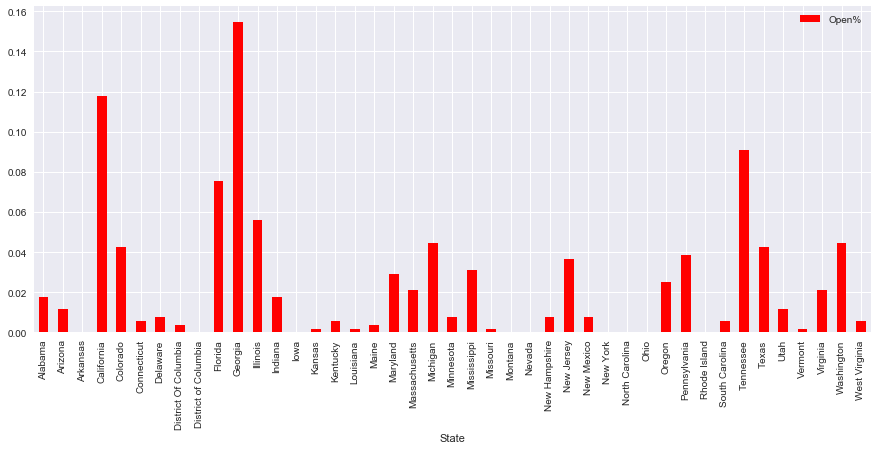

In [284]:
df_Open.plot.bar(y='Open%',figsize=(15,6), color='red')

# Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

In [365]:
df_resolved =df_comcast.groupby(['Ticket_Status','Received Via'])['Ticket_count'].sum().unstack().fillna(0)
df_resolved['Total']=df_resolved['Customer Care Call'] +df_resolved['Internet']
#df_resolved['Closed%'] = df_resolved['Closed']/df_resolved['Total']
df_resolved
#df_resolved.style.format({'Closed%': "{:.2%}"})

Received Via,Customer Care Call,Internet,Total
Ticket_Status,,,
Closed,864,843,1707
Open,255,262,517


In [366]:
df_resolved.loc['Grand Total'] = df_resolved.sum()
df_resolved

Received Via,Customer Care Call,Internet,Total
Ticket_Status,,,
Closed,864,843,1707
Open,255,262,517
Grand Total,1119,1105,2224


In [370]:
df_resolved_pct = df_resolved.div(df_resolved['Total'][-1]).mul(100).round(2).astype(str) + '%'
df_resolved_pct

Received Via,Customer Care Call,Internet,Total
Ticket_Status,,,
Closed,38.85%,37.9%,76.75%
Open,11.47%,11.78%,23.25%
Grand Total,50.31%,49.69%,100.0%


In [371]:
# approximately 77% of the tickets were closed till date and out of which
# 39% is from Customer care call and 38% is via Internet

######################################################################################